# Exercise 4: Climatologies, Anomlies and Hovmöller

*This notebook has been created by Julia Kukulies (julia.kukulies@gu.se) as a modified version from the exercise for GVN370 that has been created by Céline Heuzé.*

For climate studies, looking at long time series that cover several decades is really common. But you
would rarely look at them directly as they are provided. Instead, you will study how a specific period
has changed compared to a reference period, or how a specific year departs from the “normal”.
Today, you will learn the (simple, trust me) methods to perform these studies: 


- compute climatologies
- plot Hovmöller diagrams
- calculate anomalies
- and normalise your timeseries



I will use the 1990-2020 monthly sea surface temperature (SST) from ERA5.

# Compute climatologies 

A climatology is the average of your timeseries over a chosen time period, usually 30 years. It can be
the average of the whole signal. It can also be the average of each month, which is what we will do
here. Basically, we want to compute the average seasonal cycle. How do we do that? Same way you calculated the median/mean in ex2.

As usual, define the path to the right folder if needs be, and use **xarray** to load the data you will use.
If you use the same file as I do, sst has four dimensions, where the third is called “expver”. This is to
identify whether the data comes from ERA5 or ERA5T. It really does not matter here, so you can just index the data with the method [xarray.Dataset.isel](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.isel.html) and choose one of the two entries in this dimensions:

In [2]:
import xarray as xr 
import numpy as np 

era5 = 'ERA5_monthly_SST_global_19902020.nc'
data= xr.open_dataset(era5)
sst = data.sst.isel(expver =0)

In [ ]:
# calculating the seasonal curve  
sst_clim = sst.groupby('time.month').mean('time', skipna = True) 

In [43]:
sst_clim.data.shape

(12, 721, 1440)

The dimensions of you climatology variable should be this: 

# Hovmöller diagram 

We are going to verify the look of sst_clim using a Hovmöller diagram. This type of plot usually has
time on the x-axis and a spatial dimension on the y-axis. We use it to observe how a signal spreads as
time progresses.


We will do a Hovmöller diagram of sst_clim (or whatever you called you climatology variable) by fixing the longitude to Bering Strait (find its longitude
yourself), and then use [plt.pcolormesh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html):

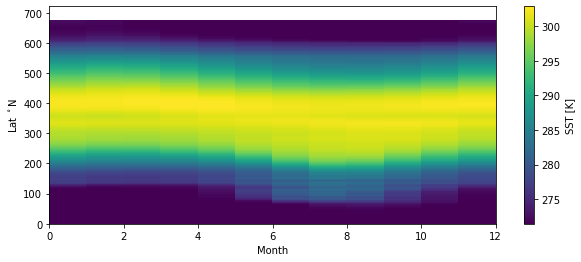

In [86]:
# make the plot 
import matplotlib.pyplot as plt 

plt.figure(figsize=(10,4))

# transpose the data with T, so that you have months on the xaxis 
plt.pcolormesh(bering.T, cmap = 'viridis', shading = 'auto')
plt.colorbar(label= 'SST [K]')
plt.xlabel('Month')
plt.ylabel('Lat $^\circ$N')
plt.show()



If you feel like you have time today, do a more advanced pcolormesh that would actually have the latitudes
on the y-axis, and not just their index. To do so, you need to use [numpy.meshgrid()](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) again to create a latitude
matrix and a time matrix that have the same dimensions as what you want to plot:

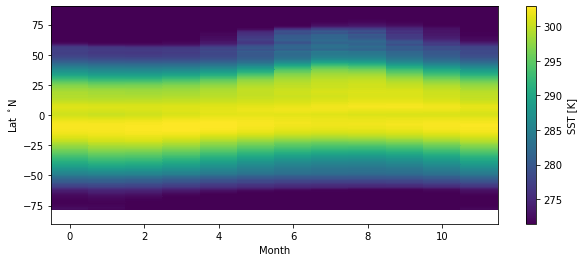

In [87]:
# create grid for values 
y, x = np.meshgrid( np.arange(12), data.latitude.values)

# make the plot 
plt.figure(figsize=(10,4))
plt.pcolormesh(y,x, bering.T, cmap = 'viridis', shading = 'auto')

plt.colorbar(label= 'SST [K]')
plt.xlabel('Month')
plt.ylabel('Lat $^\circ$N')

plt.show()


Et voilà! Directly in the right orientation, with latitude on the y-axis. So, what do you see on this plot?


Explore the data on your own and make other Hovmöller diagrams. For example, see if you can see
the seasonal cycle that causes sea ice growth and retreat in the Southern Ocean by fixing the
latitude to 60°S.

# Calculate anomalies 


An anomaly is how much your measurement deviates from the reference of the climatology. The
typical climate change information of “so many degrees above pre-industrial” is an anomaly.
To calculate an anomaly, you simply subtract the climatology from your signal.
Let’s do it over the tropical east Pacific (the El Niño region). Pick a location around 10°S and 100°W.
This is what I obtain if I do

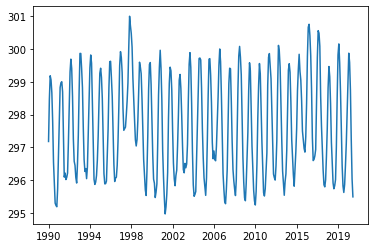

In [104]:
# quick plot of El nino/East Pacific timeseries 
plt.plot(elnino)
plt.xticks(np.arange(elnino.shape[0])[::50], elnino.time.dt.year.values[::50])
plt.show()

There is one Python issue that prevents us from directly doing sst – sst_clim; can you guess it?



**Answer**: their third dimensions have different lengths (31 years for sst, but only 12 months for
sst_clim). So, we need to use [numpy.tile()](https://numpy.org/doc/stable/reference/generated/numpy.tile.html) on sst_clim to repeat it 31 times.

In [123]:
elnino_ano= elnino - np.tile(elnino_clim, 31)

Let’s look at the anomaly at that same east Pacific location:

- What do you see?
- What does an anomaly > 0 mean?
-  Can you identify the years with positive anomalies, and figure out what happened? (think where this point is)

In [132]:
# anomaly for entire grid (transpose needed because the stanard is to repeat along the last dimension)
sst_ano = sst - np.tile(sst_clim.T, 31).T

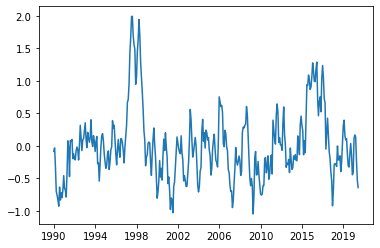

In [124]:
# quick plot of El nino/East pacific timeseries 
plt.plot(elnino_ano)
plt.xticks(np.arange(elnino.shape[0])[::50], elnino.time.dt.year.values[::50])
plt.show()

# Normalization 

For some variables, the anomalies themselves will have a seasonal cycle. The sea ice cover or thickness
is a typical example, with much larger anomalies possible by definition in winter than in summer. In
which case, removing the mean (the climatology) is not enough, you need to properly normalise the
data, i.e. remove the mean AND divide by the standard deviation.


Can you think of how to do this?



Similar to how you created the monthly climatology, you first need to compute the “monthly standard
deviation”:


In [120]:
# calculating the seasonal curve  
sst_std = sst.groupby('time.month').std('time', skipna = True)  

In [135]:
sst_norm = sst_ano / np.tile(sst_std.T, 31).T

Same location in the east Pacific. The values are
much higher, especially in 1998. What does this
mean?
Have you ever read or heard something described
as “within one standard deviation”? If so, that’s
what it means: normalised values between -1 and 1. The larger the normalised value, the more
extreme the anomaly.

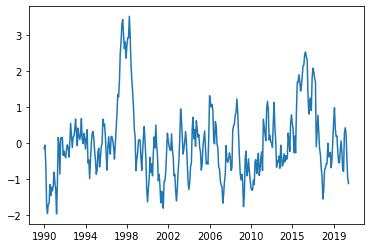

In [138]:
# quick plot of El nino/East Pacific timeseries 
plt.plot(elnino_norm)
plt.xticks(np.arange(elnino.shape[0])[::50], elnino.time.dt.year.values[::50])
plt.show()